### Visualizando ativações intermediárias

In [1]:
#Importanto a rede que implementei em cats_and_dogs_small.ipynb
from keras.models import load_model

model = load_model('cats_and_dogs_small_1.h5')

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 17, 17, 128)     

In [2]:
# Usando a imagem de um gato que não foi usada no treinamento da rede

img_path = 'C:/Users/vitor/Desktop/Iniciação Científica/Notebooks/cats_and_dogs_small/test/cats/cat.3002.jpg'

from keras.preprocessing import image
from keras import utils
import numpy as np

img = utils.load_img(img_path, target_size=(150,150))
img_tensor = utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


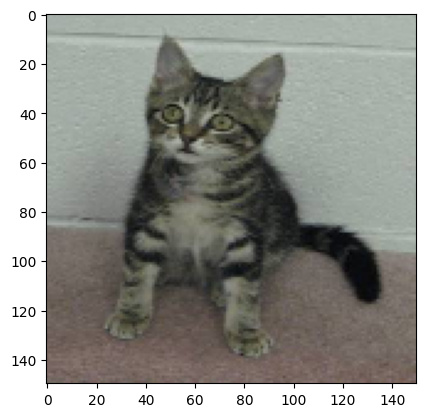

In [3]:
# Visualizando a imagem
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [4]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs= model.input, outputs=layer_outputs)

In [5]:
# Retorna uma lista com arrays numpy com as ativações de cada camada.
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 126ms/step


In [6]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


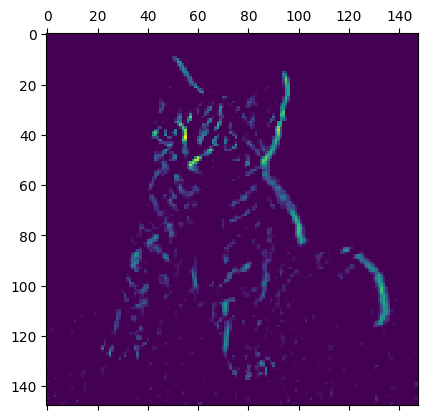

In [7]:
# Visualizando o quarto canal da primeira camada de ativação

plt.matshow(first_layer_activation[0,:,:,4], cmap = 'viridis')

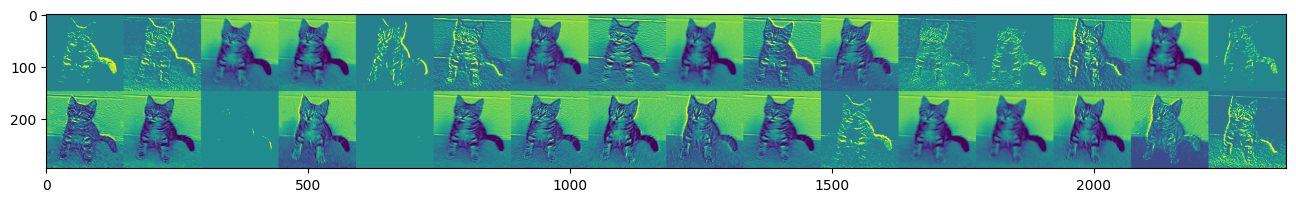

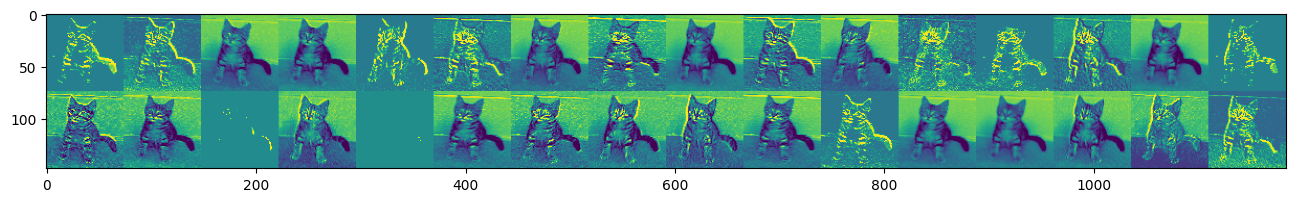

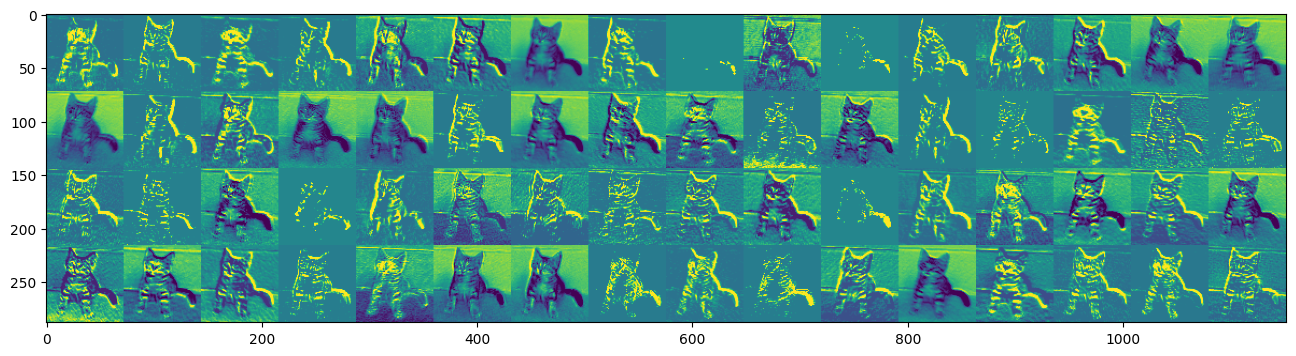

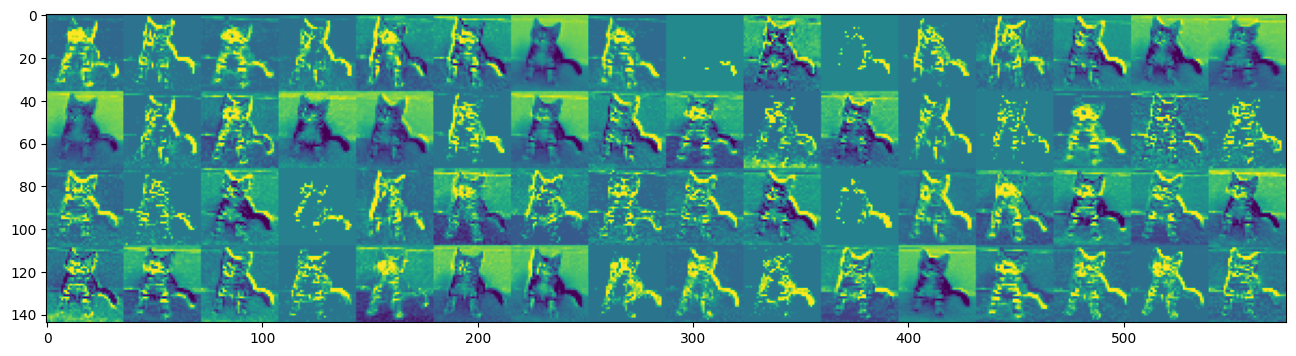

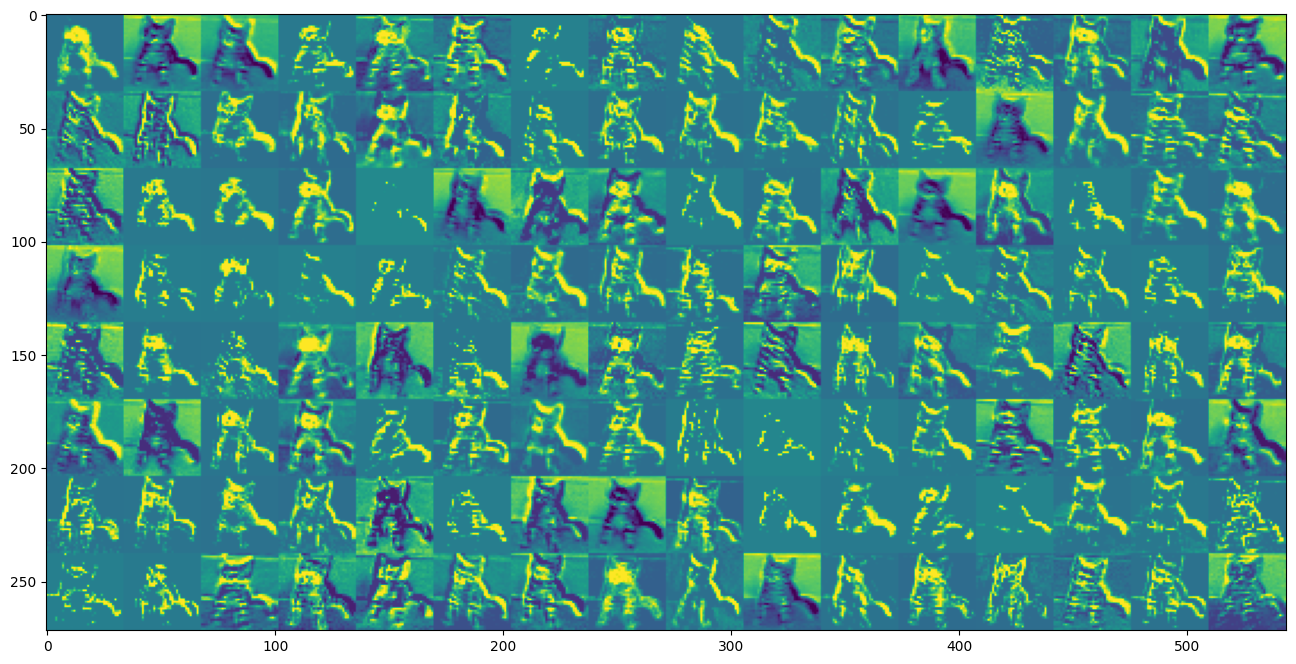

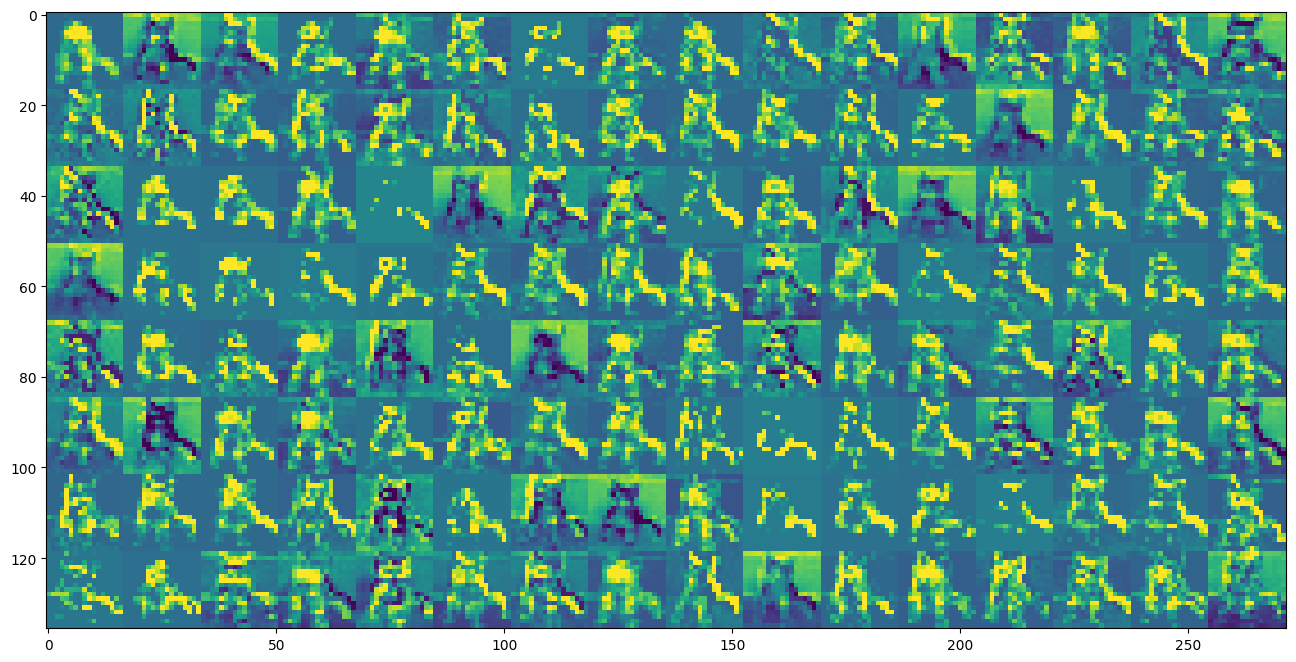

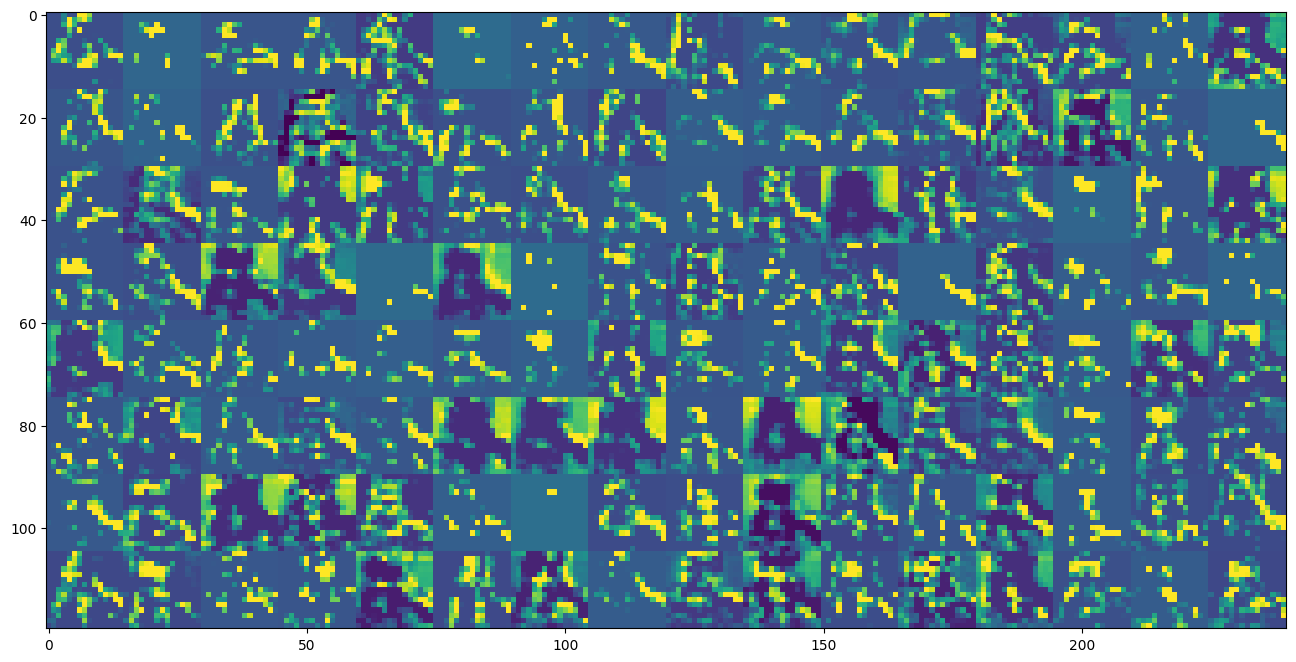

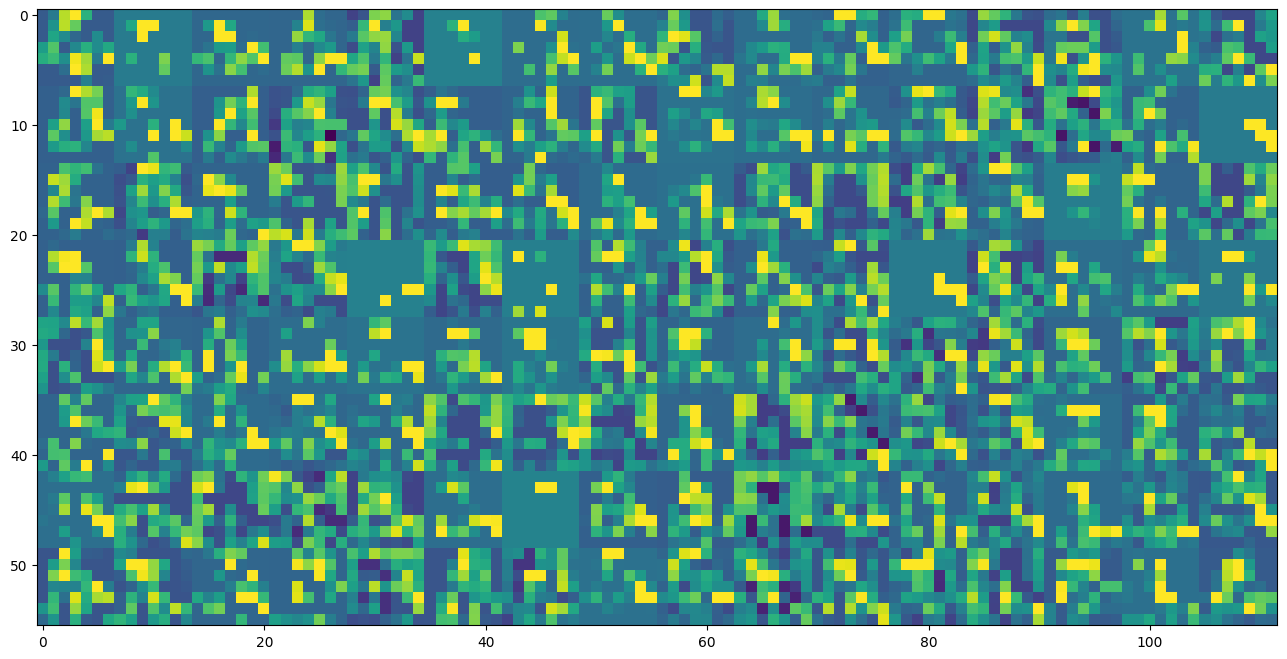

In [8]:
# Visualizando todos o canais de todas as ativações intermediárias

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_activation in activations:
    
    n_features = layer_activation.shape[-1] #numero de filtros
    size = layer_activation.shape[1] #resolucao
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size*n_cols, images_per_row*size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col*images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize = (scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')